# 인공지능 과제 2
---
이름: 김태산

학과: 자동차공학과

학번: 20143211

---
### 1. [선형회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.

In [ ]:
# 관련 라이브러리
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

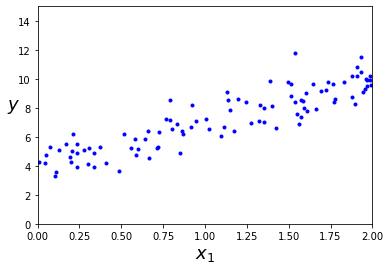

In [ ]:
# 아래의 코드는 선형회귀 모델을 훈련시키기 위한 훈련 데이터를 생성하는 코드이다.
X = 2 * np.random.rand(100, 1)            # 100개의 훈련 샘플 x 생성한다.
                                          # 0-1 사이의 난수를 생성한 후 2를 곱하여
                                          # 데이터의 범위가 0-2가 되도록 만든다.
y = 4 + 3 * X + np.random.randn(100, 1)   # 선형 데이터를 생성하기 위해 
                                          # 직선 y = 4 + 3*x를 사용하여 100개의 결과값 y를 생성한다.
                                          # 여기에 정규분포 난수를 더하여 노이즈를 추가한다.

# 생성된 훈련 데이터를 시각화한다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)           # 문자열에 $...$를 붙여 문자를 이탤릭체로 표시한다.
plt.ylabel("$y$", rotation=0, fontsize=18) # rotation=0으로 지정하여 문자의 회전각을 0으로 표시한다.
plt.axis([0, 2, 0, 15])
plt.show()

#### **정규방정식**
- 위에서 생성한 선형 데이터의 특징값이 1개이므로, 선형회귀 모델은 y = θ * x = θ0 + θ1 * x로 지정한다.
- 정규방정식은 손실함수를 최소화하는 가중치를 찾기 위한 해석적인(수학적인) 방법이다.
- 정규방정식의 식은 다음과 같다.

> 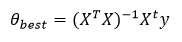

- 여기서 θ_best가 손실함수를 최소화하는 가중치 값을 의미한다.
- 따라서 정규방정식에 맞게 데이터를 입력하면 최적의 가중치를 구할 수 있다.

In [ ]:
### 정규 방정식을 사용한 선형회귀 접근 ###
X_b = np.c_[np.ones((100, 1)), X] # 훈련 샘플 x에 편향 x0 = 1을 추가하는 코드이다.
                                  # np.c_[]는 두 배열을 column 방향으로 붙여준다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
                                  # 정규방정식을 통해 최적의 가중치를 계산한다.
                                  # np.linalg는 numpy 선형대수 모듈이다.
                                  # 선형대수 모듈에 있는 inv() 함수는 행렬의 역행렬을 구해준다.
                                  # numpy의 dot() 메서드는 두 행렬의 행렬곱을 수행한다.
# (1) theta_best 출력 확인
theta_best

array([[4.01105516],
       [2.96332088]])

- 선형 데이터를 생성할 때 직선 y = 4 + 3 * x를 사용하였기 때문에 최적의 가중치를 계산한 결과 또한 4와 3에 비슷해야 좋은 결과라고 할 수 있다.
- 출력 결과를 보면, 데이터에 노이즈가 포함되어 있음에도 선형회귀 모델 y = θ0 + θ1 * x에서 최적의 가중치가 θ0 = 4.01105516, θ1 = 2.96332088이므로 각각 4와 3에 근접함을 알 수 있다.

In [ ]:
# 위에서 구한 가중치가 올바른 결과를 출력하는지 테스트하기 위한 코드이다.
X_new = np.array([[0], [2]])            # 새로운 테스트 샘플을 2개 생성한다.
X_new_b = np.c_[np.ones((2, 1)), X_new] # 생성한 테스트 샘플에 편향을 추가한다.
y_predict = X_new_b.dot(theta_best)     # 가중치와 테스트 샘플을 선형회귀 모델에 입력하여
                                        # 예측값을 계산한다.
# (2) y_predict 출력 확인
y_predict

array([[4.01105516],
       [9.93769693]])

- 직선 y = 4 + 3 * x에서 x = 0일 때 y = 4이고, x = 2일 때 y = 10이므로 선형회귀 모델 또한 이와 비슷한 결과를 출력하여야 한다.
- 정규방정식을 통해 구한 최적의 가중치를 이용하여 x = 0일 때와 x = 2일 때의 예측값을 출력한 결과 x = 0일 때의 y_predict = 4.01105516, x = 2일 때의 y_predict = 9.93769693이므로 각각 비슷한 결과를 출력함을 알 수 있다.

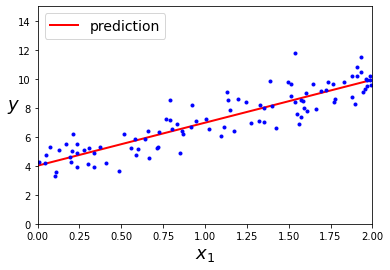

In [ ]:
# 선형회귀 모델의 예측값을 통해 결과 그래프를 시각화한다.
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)           
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()
# (3) 화면 결과 출력

- 위의 그래프를 보면, 선형회귀 모델이 훈련 데이터를 따라 직선 형태로 훈련 데이터를 설명하는 것을 확인할 수 있다.

#### **특잇값 분해(SVD)**
- 선형 회귀 모델은 y = θ * X(여기서 X는 훈련 샘플 전체를 나타내는 행렬이고, y는 각 훈련 샘플에 대한 결과값으로 된 벡터이다.)로 나타낼 수 있다.
- 단순하게 생각하면 모델에서 최적의 가중치를 구하기 위해서는 X의 역행렬을 양변에 곱하면 된다.
- 여기서 X의 역행렬을 계산할 때 특이값 분해가 사용된다.
- X를 특잇값 분해하여 표현하면 다음과 같다.
> 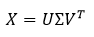
- 여기서 U는 X * X^T의 고유벡터를 열에 배치한 특이행렬, V는 X^T * X의 고유벡터를 열에 배치한 특이행렬, Σ는 X * X^T의 고윳값의 제곱근을 대각선에 배치한 대각행렬이다.
- 위와 같이 X를 특잇값 분해하면, X의 역행렬을 특이행렬과 대각행렬을 통해 구할 수 있다.
- 행렬 X의 역행렬은 다음과 같이 구한다.
> 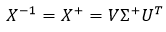

- 따라서 위에서 구한 X의 역행렬과 y를 곱해 최적의 가중치 θ를 계산할 수 있다.

In [ ]:
# 특잇값 분해를 통해 훈련 데이터의 역행렬을 구하고, 결과값 y와 곱해 최적의 가중치를 구하는 코드이다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
                                      # np.linalg.lstsq()는 특잇값 분해를 통해 역행렬을 구한 후,
                                      # 이를 결과값과 곱하여 최적의 가중치를 구해주는 함수이다.
# (4) theta_best_svd 출력 확인
theta_best_svd

array([[4.01105516],
       [2.96332088]])

- 출력 결과를 보면, 선형회귀 모델 y = θ0 + θ1 * x에서 θ0 = 4.01105516, θ1 = 2.96332088이므로 훈련 데이터 생성 직선 y = 4 + 3 * x와 유사함을 알 수 있다.

In [ ]:
# (5) np.linalg.pinv(X_b).dot(y) 출력 확인
np.linalg.pinv(X_b).dot(y) # np.linalg.pinv()는 특잇값 분해를 통해 행렬의 역행렬을 계산해주는 함수이다.
                           # 따라서 X_b의 역행렬을 위의 함수로 구한 후 y와 행렬곱하면
                           # 최적의 가중치 θ를 구할 수 있다.

array([[4.01105516],
       [2.96332088]])

- 출력 결과를 보면, 선형회귀 모델 y = θ0 + θ1 * x에서 θ0 = 4.01105516, θ1 = 2.96332088이므로 훈련 데이터 생성 직선 y = 4 + 3 * x와 유사하고, np.linalg.lstsq() 함수를 사용한 결과와 동일한 것을 알 수 있다.

#### **경사 하강법**
- 난수로 가중치를 임의의 값으로 초기화한 후, 선형회귀 모델의 손실함수에 경사 하강법을 적용하여 해당 가중치에서의 손실함수의 그레디언트(기울기)를 구하고, 그레디언트가 작아지는 방향으로 가중치를 갱신함으로써 최적의 가중치를 찾는다.
- 선형회귀 모델의 손실함수로는 MSE(Mean Square Error)를 사용한다.
- MSE와 MSE의 가중치에 대한 편도함수는 다음과 같다.
>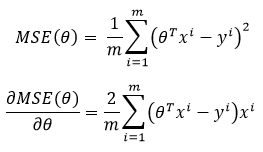
- 여기서 MSE(θ)는 스칼라이고, θ는 벡터이므로 MSE(θ)의 θ에 대한 편도함수는 그레디언트이고 이에 대한 식으로 다시 정리하면 다음과 같다.
> 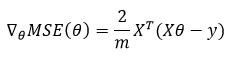
- 따라서 위의 편도함수 식을 사용하여 그레디언트를 계산하고 아래의 코드에서 theta = theta - eta * gradients를 통해 가중치를 손실함수가 작아지는 방향으로 갱신하게 된다.

In [ ]:
### 경사 하강법을 사용한 선형회귀 접근 ###
eta = 0.1                     # 경사하강법의 학습률을 0.1로 초기화한다.
n_iterations = 1000           # 경사하강법을 통한 선형회귀 모델의 학습 횟수를 지정한다.
m = 100                       # 선형 데이터의 샘플 갯수이다.
theta = np.random.randn(2, 1) # 가중치를 난수로 초기화한다.

for epoch in range(n_iterations):                 # 매 epoch마다
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 가중치에 대한 손실함수의 그레디언트를 계산하고
  theta = theta - eta * gradients                 # 계산된 그레디언트로 가중치를 갱신한다.
# (6) theta 출력 확인
theta

array([[4.01105516],
       [2.96332088]])

- 출력 결과를 보면, 경사하강법을 통해 구한 선형회귀 모델 y = θ0 + θ1 * x의 가중치(θ0 = 4.01105516, θ1 = 2.96332088) 또한 훈련 데이터 생성 직선 y = 4 + 3 * x와 유사하게 구해지는 것을 확인할 수 있다.

In [ ]:
# (7) X_new_b.dot(theta) 출력 확인
y_predict = X_new_b.dot(theta) # 테스트 샘플 X_new_b와 가중치를 행렬곱하여 예측값을 구한다.
y_predict

array([[4.01105516],
       [9.93769693]])

- 직선 y = 4 + 3 * x에서 x = 0일 때 y = 4이고, x = 2일 때 y = 10이다.
- 경사하강법을 통해 구한 최적의 가중치를 이용하여 x = 0일 때와 x = 2일 때의 예측값을 출력한 결과 x = 0일 때의 y_predict = 4.01105516, x = 2일 때의 y_predict = 9.93769693이므로 각각 위의 직선과 비슷한 결과를 출력함을 알 수 있다.

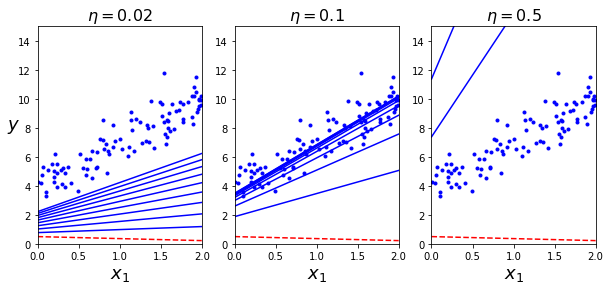

In [ ]:
# 아래의 코드는 학습률에 따른 선형회귀 모델의 학습 과정을 보여주기 위한 코드이다.
# 경사 하강법을 통한 학습 과정을 초기 10회의 epoch에 대한 선형회귀 모델의 그래프로 보여준다.
theta_path_bgd = []
# 학습 데이터와 선형회귀 모델을 그리기 위한 함수를 정의한다.
def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, "b.")                         # 학습 데이터를 그린다.
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:                         # 총 학습횟수에서 초기 10회에 대한 그래프를 그린다.
      y_predict = X_new_b.dot(theta)           # X_new_b는 이전에 생성한 테스트 샘플이다.
      style = "b-" if iteration > 0 else "r--" # 모델의 훈련 시작 전의 난수로 초기화된 모델은 빨간 점선으로,
                                               # 학습이 진행된 모델은 파란 실선으로 그린다.
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients            # 경사 하강법을 통해 모델을 학습시킨다.
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)           # 코드가 반복 실행되어도 동일한 난수가 생성되도록 한다.
theta = np.random.randn(2,1) # 선형회귀 모델의 가중치를 임의의 값으로 초기화한다.
plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) # 학습률이 0.02일 때의 그래프를 그린다.
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
                                                         # 학습률이 0.1일 때의 그래프를 그린다.
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)  # 학습률이 0.5일 때의 그래프를 그린다.
plt.show()
# (8) 화면 출력 확인

- 학습률은 경사 하강법에서 가중치가 갱신되는 정도를 결정하는 파라미터이고, 학습률이 작을수록 가중치가 작은 비율로 갱신되고 클수록 가중치가 큰 비율로 갱신된다.
- 학습률이 0.02인 그래프를 보면, 선형회귀 모델이 빨간 점선에서 시작하여 좁은 간격으로 학습 데이터에 가까워지는 것을 알 수 있다.
- 그러나 학습률이 너무 낮아 훈련이 느리게 진행되므로 최적의 가중치를 찾을 때까지 많은 훈련을 반복하여야 할 것으로 보인다.
- 학습률이 0.1인 그래프를 보면, 선형회귀 모델이 빨간 점선에서 시작하여 10회의 학습만에 거의 최적의 가중치를 찾은 것을 알 수 있다.
- 마지막으로 학습률이 0.5인 그래프를 보면, 이는 학습률이 너무 커서 선형회귀 모델이 빨간 점선에서 시작하여 최적의 가중치를 찾지 못하고 학습 데이터에서 점점 멀어지며 발산하여 심지어 그래프 상에는 2개의 직선 밖에 시각화되지 않는 것으로 보아 이는 적절한 학습률이 아닌 것을 알 수 있다.

#### **스토캐스틱 경사 하강법**
- 위에서 경사 하강법을 적용할 때에는 매 epoch마다 전체 훈련 데이터셋을 사용하여 그레디언트를 계산하였고 이를 통해서 가중치를 갱신하였는데, 이를 배치 경사 하강법이라고 한다.
- 배치 경사 하강법의 경우 훈련 데이터셋이 커질 경우 학습 시간이 매우 길어진다는 단점이 있다.
- 이를 보완하기 위한 방법이 스토캐스틱 경사 하강법인데, 이는 그레디언트를 계산할 때 전체 훈련 데이터셋에서 임의의 1개의 훈련 샘플을 선택하고 해당 샘플만을 이용하여 그레디언트를 계산하여 가중치를 갱신한다.
- 이런 방식은 훈련 시 다뤄야할 데이터가 매우 적어지므로 훈련 속도가 빨라진다는 장점이 있다.
- 그러나 훈련 샘플을 무작위로 선택하기 때문에 배치 경사 하강법보다 불안정하고, 손실함수가 최솟값을 가질 때까지 손실함수의 값이 불규칙하게 감소하며 이러한 영향으로 값이 요동치면서 전역 최솟값에 근접하나 전역 최솟값에는 도달하지 못하는 경우도 발생한다.
- 이러한 문제점을 해결하기 위해서 사용하는 방법은 아래의 코드에서도 정의되어 있듯이 학습 스케줄링을 통해 경사 하강법의 학습률을 점진적으로 감소시키는 것이다.
- 학습 스케줄링을 사용하면 훈련 초반에는 학습률을 크게하여 학습을 빠르게 진행시키고 손실함수의 지역 최솟값에 빠지지 않게해주고, 점진적으로 학습률을 작게하여 전역 최솟값 근처에서는 가중치 갱신을 적은 양으로 하면서 전역 최솟값에 도달할 수 있게 해준다.

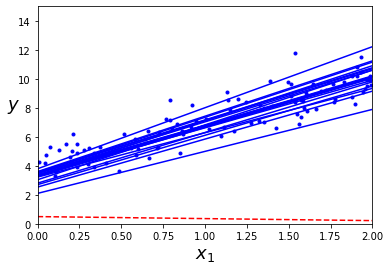

array([[4.00815629],
       [2.93883307]])

In [ ]:
### 스토캐스틱 경사 하강법을 사용한 선형회귀 접근 ###
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄을 하기 위한 상수이다. 이 값에 따라 학습률이 빠르게 감소하거나 느리게 감소한다.

# 학습률의 학습 스케줄을 하기 위한 함수를 정의한다.
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1) # 모델의 가중치를 무작위로 초기화한다.

# 스토캐스틱 경사 하강법을 구현하는 코드이다.
for epoch in range(n_epochs): # 전체 훈련 샘플 갯수만큼 학습을 완료하면 1 epoch가 된다.
  for i in range(m):          # 여기서 m은 훈련 샘플의 갯수로, 무작위로 한 개의 훈련 샘플을 사용해
                              # 모델을 훈련시키므로 이를 m회 반복한다.
    if epoch == 0 and i < 20:           # 첫번째 epoch에서 가중치가 랜덤값일 때의 모델과 
                                        # 19개의 훈련 샘플로 훈련되는 과정의 모델을 그래프로 출력한다.
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)

    random_index = np.random.randint(m) # m개의 훈련 샘플 중 무작위로 하나의 샘플에 대한 인덱스를 지정한다.
    xi = X_b[random_index:random_index+1] # 한 개의 훈련 샘플의 특징값을 입력한다.
    yi = y[random_index:random_index+1]   # 한 개의 훈련 샘플의 라벨을 입력한다.
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 한 개의 훈련 샘플에 대한 그레디언트를 계산한다.
    eta = learning_schedule(epoch * m + i) # 학습 스케줄을 통해 학습률을 지정한다.
                                           # 여기서는 epoch * m + i를 통해 매 학습마다 함수에 입력되는 값이
                                           # 점진적으로 커지도록 해주었다.
                                           # learning_schedule 함수의 그래프 개형을 생각해보면
                                           # 입력값이 커질수록 출력값은 점점 작아진다는 것을 알 수 있다.
    theta = theta - eta * gradients # 가중치를 갱신한다.
    theta_path_sgd.append(theta)

# 훈련 데이터셋을 시각화한다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
# (9) 화면 출력 확인
# (10) theta 출력 확인
theta

- 먼저 그래프 결과를 보면, 이 그래프는 첫번째 에포크에서 처음 20번의 훈련 과정만을 출력한 결과임에도 벌써 훈련 데이터에 맞는, 좋은 결과를 내는 것을 확인할 수 있다.
- 또한 가중치 출력 결과를 보면, θ0 = 4.00815629, θ1 = 2.93883307로 훈련 데이터 생성 직선 y = 4 + 3 * x와 유사하게 구해지는 것을 확인할 수 있다.
- 배치 경사하강법을 사용할 때에는 1000 에보크를 반복하여 최적의 가중치를 얻었던 반면, 스토캐스틱 경사하강법을 사용할 때에는 50 에포크만에 좋은 가중치를 얻을 수 있으므로 스토캐스틱 경사하강법이 훨씬 효율적이다.

#### **미니배치 경사 하강법**
- 미니배치 경사하강법은 배치 경사하강법과 스토캐스틱 경사하강법의 중간적인 경사하강법으로, 전체 훈련데이터셋에서 임의의 몇개의 샘플을 선택하여 미니배치라고 하는 작은 샘플 집합을 만들고 미니배치에 대해 그레디언트를 계산하여 이를 통해 가중치를 갱신하는 방법이다.
- 따라서 스토캐스틱 경사하강법보다는 덜 불안정하고, 배치 경사하강법보다는 빠르게 전역 최솟값에 도달할 수 있다.

In [ ]:
### 미니배치 경사 하강법을 사용한 선형회귀 접근 ###
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20 # 미니배치 사이즈를 20으로 지정한다. 이는 훈련 데이터셋의 크기에 따라 달라질 수 있다.
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200, 1000# 학습 스케줄을 하기 위한 상수이다. 이 값에 따라 학습률이 빠르게 감소하거나 느리게 감소한다.

# 학습률의 학습 스케줄을 하기 위한 함수를 정의한다.
def learning_schedule(t):
  return t0 / (t + t1)
t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m) # np.arange(m)의 결과를 무작위로 섞어주는 함수이다.
                                              # 이를 통해 훈련데이터셋의 인덱스를 무작위로 섞는다.
  X_b_shuffled = X_b[shuffled_indices]        # 매 epoch마다 훈련데이터셋을 섞어 미니배치에 계속해서
  y_shuffled = y[shuffled_indices]            # 서로 다른 샘플들이 선택되도록 한다.

  # 미니배치 단위로 경사하강법을 진행하여 그레디언트를 구하고 가중치를 갱신한다.
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]                       # 미니배치 단위로 훈련 샘플의 특징값을 선택한다.
    yi = y_shuffled[i:i+minibatch_size]                         # 미니배치 단위로 훈련 샘플의 라벨을 선택한다.
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 미니배치 크기로 나눠 그레디언트 평균을 구한다.
    eta = learning_schedule(t)                                  # 학습률을 learning_schedule 함수를 통해 지정한다.
    theta = theta - eta * gradients                             # 가중치를 갱신한다.
    theta_path_mgd.append(theta)
# (11) theta 출력 확인
theta

array([[4.02804079],
       [2.96401186]])

- 가중치 출력 결과를 보면, θ0 = 4.02804079, θ1 = 2.96401186로 훈련 데이터 생성 직선 y = 4 + 3 * x와 유사하게 구해지는 것을 확인할 수 있다.

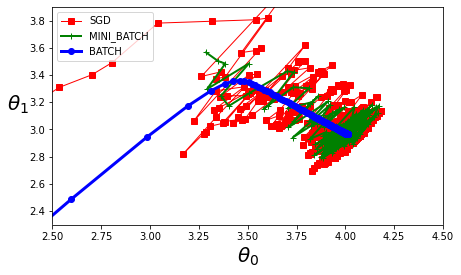

In [ ]:
# 배치 경사하강법, 스토캐스틱 경사하강법, 미니배치 경사하강법으로 
# 각각 구한 가중치들이 어떻게 갱신되어 왔는지를 매개변수 공간에서 시각화하는 코드이다.
# 아래의 numpy 배열에는 3가지의 경사하강법을 수행하면서 가중치가 갱신될 때마다
# 가중치가 append되어 입력되어 있다.
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# 가중치 갱신 과정을 시각화한다.
plt.figure(figsize=(7,4))
# 배치 경사하강법의 가중치는 파란색 실선과 점으로,
# 스토캐스틱 경사하강법의 가중치는 빨간색 실선과 점으로,
# 미니배치 경사하강법의 가중치는 녹색 실선과 점으로 시각화된다.
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
# (12) 화면 결과 출력 확인

- 위의 그래프는 각 경사하강법에서 매개변수(가중치)가 매개변수 공간에서 이동한 경로를 보여준다.
- 그래프를 보면, 배치 경사하강법의 경우 안정적으로 이동하여 전역 최솟값에 도달한 반면, 스토캐스틱 경사하강법과 미니배치 경사하강법의 경우 매우 불규칙하게 이동하고 훈련이 끝날 때까지 전역 최솟값 주변을 맴돌며 전역 최솟값에 완벽하게 도달하지 못한 것을 볼 수 있다.

### 2. [다차항회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.

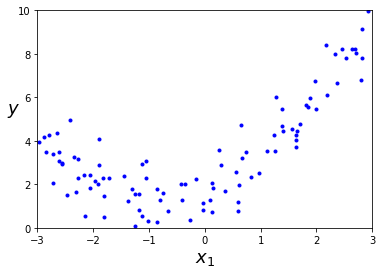

X[0]: [-0.75275929]


In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

# y = 0.5 * X**2 + X + 2의 2차 방정식을 이용하여 선형이 아닌 
# 비선형 훈련 데이터를 생성하는 코드이다.
m = 100
X = 6 * np.random.rand(m, 1) - 3               # 훈련 데이터의 범위를 -3 ~ 3으로 지정한다.
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 노이즈가 추가된 라벨을 생성한다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# 생성한 훈련 데이터는 비선형 데이터이므로 선형회귀 모델로는 데이터에 잘 맞는
# 매개변수를 구할 수 없다.

# 사이킷런(sklearn)의 PolynomialFeatures은 데이터의 특징값을 입력 차수(degree)만큼
# 거듭제곱하여 새로운 특징값으로 추가해준다. 
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures 객체를 생성한다.
# degree=2이로, include_bias=False로 지정한다.
# include_bias=True일 경우 편향 x0=1이 추가된다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # fit_transform 메서드로 훈련 데이터를 입력하여
                                        # 훈련 데이터를 제곱(degree=2)한 특징값을 추가한다.
                                        
# (1) X[0] 출력 확인
print(f"X[0]: {X[0]}")

- X[0]는 앞서 생성한 훈련 데이터의 첫번째 요소이다.

In [ ]:
# (2) X_poly[0] 출력 확인
print(f"X_poly[0]: {X_poly[0]}")
print(f"X[0] ** 2: {X[0] ** 2}")

X_poly[0]: [-0.75275929  0.56664654]
X[0] ** 2: [0.56664654]


- X_poly[0]를 보면, 기존의 X[0]의 값과 X[0]의 제곱한 값이 하나의 배열에 입력되어 있는 것을 알 수 있다.
- 따라서 거듭제곱항이 추가된 X_poly를 선형회귀 모델에 입력하면 데이터에 맞게 모델을 훈련시킬 수 있다.

In [ ]:
# LinearRegression은 사이킷런에서 제공하는 선형회귀 모델이다.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # LinearRegression 객체를 생성한다. 
lin_reg.fit(X_poly, y)       # fit 메서드에 훈련 데이터와 라벨을 입력하여 훈련을 진행한다.

# (3) lin_reg.intercept_, lin_reg.coef_ 출력 확인
print(f"lin_reg.intercept_: {lin_reg.intercept_}\nlin_reg.coef_:      {lin_reg.coef_}")

lin_reg.intercept_: [1.78134581]
lin_reg.coef_:      [[0.93366893 0.56456263]]


- 출력 결과에서 lin_reg.intercept_에는 모델의 가중치가, lin_reg.coef_에는 모델의 편향이 저장되어 있다.
- 위에서 훈련 데이터를 생성할 때 y = 2 + X + 0.5 * X^2을 사용하였고, 선형회귀 모델의 경우 y = θ0 + θ1 * X + θ2 * X^2 = 1.78134581 + 0.93366893 * X + 0.56456263 * X**2이므로 노이즈가 포함되어 있음에도 데이터 생성식과 비슷하게 결과를 출력하는 것을 알 수 있다.

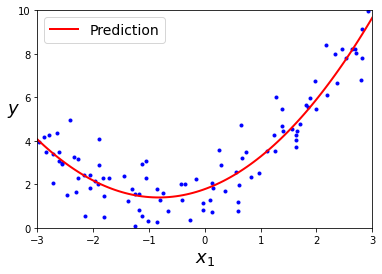

In [ ]:
# 2차 방정식의 형태로 생성된 데이터와 
# 훈련된 선형회귀 모델이 새로운 데이터로 계산한 예측값을 시각화하는 코드이다.
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # reshape을 통해 배열을 벡터 형태로 변환해준다.
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)           # predict 메서드를 사용해 예측값을 계산한다.

plt.plot(X, y, "b.") # 훈련 데이터를 시각화한다.
# 선형회귀 모델이 계산한 예측값을 시각화한다.
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
# (4) 화면 출력 확인

- 출력 그래프를 보면, 선형회귀 모델이 훈련 데이터를 따라 예측값을 잘 계산한 것을 볼 수 있고, 이를 통해 선형회귀 모델이 제대로 학습되었다는 것을 알 수 있다.

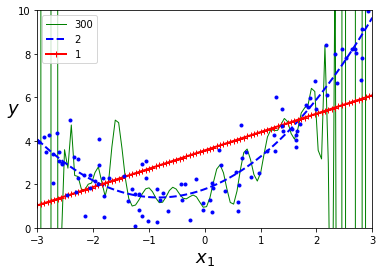

In [ ]:
# 아래의 코드는 차수가 300인 선형회귀 모델, 차수가 2차인 선형회귀 모델, 차수가 1차인 선형회귀 모델을
# 훈련시킨 후 예측값을 어떻게 계산하는지 시각화해주는 코드이다.

# 사이킷런의 StandardScaler는 데이터를 정규화해주는 클래스이다.
from sklearn.preprocessing import StandardScaler
# 사이킷런의 Pipeline은 데이터를 변환하거나 표준화한 후 모델에 입력하는 등 일련의 과정들을 
# 순서대로 처리할 수 있도록 묶어주는 클래스이다.
from sklearn.pipeline import Pipeline

# 300차수 선형회귀 모델, 2차수 선형회귀 모델, 1차수 선형회귀 모델을 차례로 훈련시키고
# 새로운 데이터로 예측값을 계산하여 시각화하는 코드이다.
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    # PolynomialFeatures 객체, StandardScaler 객체, LinearRegression 객체를 생성한다.
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    # Pipeline 객체를 통해 위에서 생성한 객체들을 아래와 같이 입력해준다.
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    # Pipeline의 fit 메서드에 훈련 데이터를 입력하면 위에서 생성한 객체에 순차적으로 입력해준다.
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new) # 새로운 데이터에 대한 예측값을 계산한다.
    # 각 모델이 계산한 예측값을 시각화한다.
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

# 훈련 데이터를 시각화한다.
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# (5) 화면 출력 확인

- 위의 결과를 보면, 2차 선형회귀 모델이 훈련 데이터를 가장 잘 표현한다는 것을 알 수 있다.
- 또 300차 선형회귀 모델을 보면, 훈련 데이터에 과대적합되어 훈련 데이터에 최대한 가까이 맞추기 위해 매우 구불구불한 형태를 보여준다.
- 1차 선형회귀 모델은 훈련 데이터에 과소적합되어 훈련 데이터를 잘 표현하지 못한다.

### 3. [규제] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.

- 머신러닝에서 규제는 모델의 과대적합을 감소시키기 위해 사용되는 방법이다.
- 말 그대로 모델에 규제를 가함으로써, 매개변수들의 자유도를 감소시켜 모델이 훈련 데이터에 과대적합되기 어렵게 만든다.
- 현대 머신러닝에서는 과대적합이 될 정도로 용량이 큰 모델을 선택한 후, 모델에 규제를 적용하여 과대적합을 줄여나가는 방법을 많이 사용한다.
- 이번 실습에서는 대표적인 규제 방법 중 하나인 Ridge라는 규제를 사용한 선형회귀에 대해서 알아본다.
- Ridge 회귀는 가중치를 감쇠시키는 규제 기법으로, 기존의 손실함수에 규제 항을 추가하여 가중치의 크기가 작게 유지되도록 만든다.
- Ridge 회귀의 손실함수에 대한 식은 다음과 같다.
> 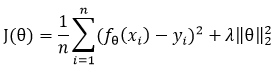
- 위의 손실함수는 MSE를 사용한 것이고, 규제 항으로 L2 norm에 관한 항이 추가된 것을 알 수 있다.
- 여기서 λ는 주어진 가중치의 감쇠 선호 정도를 제어하는 상수값이다.
- 직관적으로 생각하면 λ 값이 커질 경우 손실함수 값은 최소화해야 하므로 λ와 곱해진 가중치의 값을 작게 만들어야 손실함수 값을 작게 유지할 수 있다.
- 이런 식으로 가중치에 규제를 가함으로써 가중치가 어떤 범위를 넘어서는 값을 가지지 못하도록 하여 모델이 훈련 데이터에 과대적합되지 않도록 만든다.

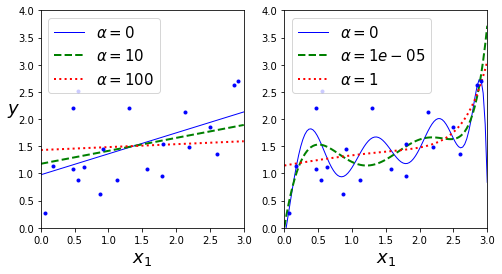

In [ ]:
# 관련 라이브러리
# 사이킷런에는 Ridge 회귀를 적용할 수 있는 Ridge 클래스가 정의되어 있다.
from sklearn.linear_model import Ridge

# 선형회귀와 Ridge 회귀를 훈련시킬 훈련 데이터를 생성한다.
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# 회귀 모델들을 훈련시키고 훈련 결과를 시각화하는 함수를 정의한다.
def plot_model(model_class, polynomial, alphas, **model_kargs):
    # model_class에는 사용할 모델명을 입력한다.
    # polynomial에는 다차항 회귀의 사용 여부를 bool 값으로 입력한다.
    # alphas에는 Ridge 회귀를 사용할 경우에 지정할 규제 상수 λ를 입력한다.
    # 실습에서는 3개의 서로 다른 λ를 사용하므로 이를 튜플 형태로 입력해주었다.
    # **model_kargs에는 모델 객체를 생성할 때 지정할 파라미터를 입력해준다.

    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # 아래의 코드를 보면 λ=0일 때는 선형회귀 모델을 사용하도록 되어 있다.
        # 실제로 Ridge 회귀의 손실함수 식을 보면, λ=0일 때는 기존의 선형회귀와 동일한 손실함수이므로
        # 선형회귀 모델을 사용하는 것과 동일한 결과를 보인다.
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial: # 다차항 회귀를 적용할 경우에는 아래의 코드와 같이 Pipeline을 통해 모델 객체를 생성한다.
            model = Pipeline([  
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)                    # 모델을 훈련시킨다.
        y_new_regul = model.predict(X_new) # 새로운 데이터에 대한 예측값을 계산한다.
        
        lw = 2 if alpha > 0 else 1         # λ에 따라 시각화 시 선의 두께를 결정한다.
        # 새로운 데이터에 대한 예측값을 사용해 모델의 훈련 결과를 시각화한다.
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
        
    plt.plot(X, y, "b.", linewidth=3)      # 모델을 훈련시킨 훈련 데이터를 시각화한다.
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
# Ridge 회귀의 모델 훈련 결과를 시각화한다. 다차항 회귀는 사용하지 않는다.
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
# Ridge 회귀의 모델 훈련 결과를 시각화한다. 이번에는 다차항 회귀를 사용하고, 차수는 10차로 지정한다.
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
# 화면 출력 확인 및 결과 해석

- 먼저 왼쪽 그래프부터 보면, 다차항 회귀가 아닌 기존의 선형회귀를 사용하므로 3개의 모델 모두 직선 형태인 것을 알 수 있다.
- 직선의 형태를 이해해보면, alpha(λ와 동일)=0일 때는 단순 선형회귀 직선이므로 규제가 가해지지 않아 직선의 기울기가 다른 직선들보다 큰 것을 알 수 있다.
- 또 alpha 값이 커질수록 직선의 기울기가 점점 작아지는 것을 알 수 있는데 이를 선형회귀 모델로부터 생각해보면, y = θ0 + θ1 * x에서 모델에 규제가 가해져 가중치 θ1의 값이 점점 작아지기 때문에 그래프에서 직선의 기울기가 작아지는 결과를 보이는 것이다.
- Ridge 회귀에서 편향은 규제 항에 추가되지 않기 때문에 직선의 절편은 alpha 값에 영향을 받지 않는다.
- 다음으로 오른쪽 그래프를 보면, alpha = 0인 다차항 회귀 모델의 경우 훈련 데이터에 과대적합되어 구불구불한 곡선을 그린다.
- 그리고 alpha 값이 커질수록 곡선의 구불구불한 정도가 줄어들며 alpha=1일 때는 거의 직선과 같이 보이는 구간도 보인다.
- 따라서 alpha 값이 커지면서 과대적합이 줄어드는 것으로 볼 수 있다.
- 다시 말해, 모델이 훈련 데이터와의 거리가 멀어지므로 편향은 증가하고 반대로 모델의 자유도가 낮아지면서 분산은 줄어든다는 것을 알 수 있다.

### 4. [활성함수] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.

- 아래의 함수 중 derivative 함수는 한 점에서의 함수의 미분값을 계산해주는 함수이다.
- 이에 대한 식은 다음과 같다.

> 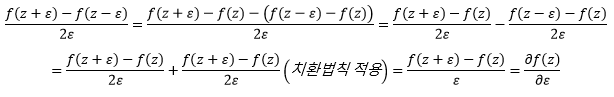

- 여기서 ε이 미소값이므로 한 점 z에 대한 f(z)의 미분값을 계산한다고 할 수 있다.

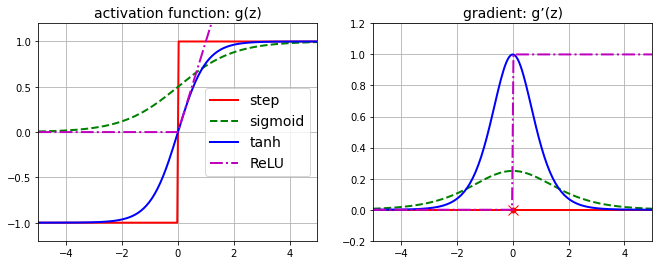

In [ ]:
# 파이썬 2, 파이썬 3 지원
from __future__ import division, print_function, unicode_literals
# 관련 라이브러리
import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# logistic sigmoid 함수를 계산하는 함수이다.
def logit(z):
  return 1 / (1 + np.exp(-z))

# relu 함수를 계산하는 함수이다.
def relu(z):
  return np.maximum(0, z)

# 입력한 함수(f)의 한 점(z)에서 미분값을 계산하는 함수이다.
def derivative(f, z, eps=0.000001):
  return (f(z + eps) - f(z - eps))/(2 * eps)

# x축의 범위를 지정한다.
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
# step(계단) 함수를 계산하여 시각화한다.
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
# logistic sigmoid 함수를 계산하여 시각화한다.
plt.plot(z, logit(z), "g--", linewidth=2, label="sigmoid")
# tanh sigmoid 함수를 계산하여 시각화한다.
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
# ReLU 함수를 계산하여 시각화한다.
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function: g(z)", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
# step 함수의 1차 도함수를 계산하여 시각화한다.
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="step ")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
# logistic sigmoid 함수의 1차 도함수를 계산하여 시각화한다.
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="sigmoid")
# tanh 함수의 1차 도함수를 계산하여 시각화한다.
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="tanh")
# ReLU 함수의 1차 도함수를 계산하여 시각화한다.
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("gradient: g’(z)", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()
# 화면출력 확인 및 각 활성함수의 특징을 비교 서술

- 출력 결과의 왼쪽 그래프는 각 활성함수들을 시각화한 그래프이고, 오른쪽 그래프는 각 활성함수들의 1차 도함수를 시각화한 그래프이다.
- 먼저 step 함수를 보면, 임계값 z = 0을 기준으로 왼쪽은 -1, 오른쪽은 1의 값을 가지는 것을 알 수 있다.
- 또 step 함수의 경우 z = 0 이외의 모든 점들의 미분값이 0이고, 이를 오른쪽 그래프에서도 빨간 실선으로 확인할 수 있다.
- 다음으로 logistic sigmoid 함수는 함수값이 0 ~ 1 사이에서 S자 형태를 그리고 z = 0을 기준으로 오른쪽 방향은 1로 수렴, 왼쪽 방향은 0으로 수렴하는 것을 확인할 수 있다.
- logistic sigmoid 함수의 1차 도함수는 0에서 최댓값(변곡점)을 가지고, 0을 기준으로 왼쪽과 오른쪽 방향 모두 0으로 수렴하는 것을 알 수 있다.
- 다음으로 tanh 함수는 함수값이 -1 ~ 1 사이에서 S자 형태를 그리고 z = 0을 기준으로 오른쪽 방향은 1로 수렴, 왼쪽 방향은 -1로 수렴하는 것을 확인할 수 있다.
- tanh 함수의 1차 도함수는 0에서 최댓값(변곡점)을 가지고, 0을 기준으로 왼쪽과 오른쪽 방향 모두 0으로 수렴하는 것을 알 수 있다.
- 깊은 신경망에서 활성함수로 logistic sigmoid나 tanh 함수를 사용할 경우 도함수의 값이 0으로 수렴하는 구간이 존재하여 해당 구간의 값이 활성함수로 입력되면, 오류 역전파를 진행할 때 gradient vanishing 문제가 발생할 수 있다.
- gradient vanishing 문제가 발생하면, 전달해야될 오류가 있음에도 gradient 값이 매우 작아지거나 0이 되어 오류가 제대로 전달되지 않는 경우가 생긴다.
- 이를 해결하기 위해 사용하는 활성함수가 ReLU 함수이다.
- ReLU 함수를 살펴보면, ReLU의 함수값은 z < 0일 때 f(z) = 0, z >= 0일 때 f(z) = z이다.
- 이에 대한 1차 도함수를 구하면, z < 0일 때 f'(z) = 0, z >= 0일 때 f'(z) = 1이 되고, 이를 오른쪽 그래프에서도 확인할 수 있다.
- 따라서 ReLU 함수를 활성함수로 사용할 경우 활성화되는 구간(z >= 0)에서의 미분값은 항상 1이 되므로, gradient vanishing이 발생하여 오류가 전달되지 않는 문제가 생기지 않게 된다.

### 5. [오류 역전파] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요. (4점, 각 1점)

In [ ]:
import numpy as np
np.random.seed(0)

N, D = 3, 4

x = np.random.randn(N, D)
y = np.random.randn(N, D)
z = np.random.randn(N, D)

a = x * y
b = a + z
c = np.sum(b)
# (1) 해당 연산망의 그래프 연산을 손으로 작성

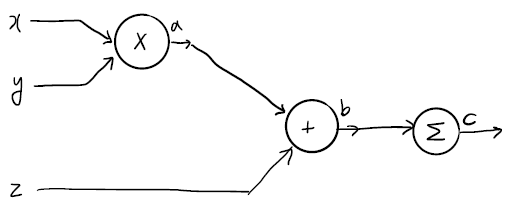

- 행렬 x와 행렬 y의 element-wise 곱을 통해서 행렬 a를 계산하고, 행렬 a와 행렬 z를 더하여 행렬 b를 계산하고, 마지막으로 행렬 b의 모든 요소를 합하여 스칼라값 c를 계산하여 전방전파를 수행한다.

In [ ]:
grad_c = 1.0
grad_b = grad_c * np.ones((N, D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a*y
grad_y = grad_a*x
# (2) 위의 연산을 통한 grad_c, grad_b, grad_a, grad_z, grad_x, grad_y 출력 확인
print(f"grad_c: {grad_c}\ngrad_b:\n{grad_b}\ngrad_a:\n{grad_a}")
print(f"grad_z:\n{grad_z}\ngrad_x:\n {grad_x}\ngrad_y:\n{grad_y}")

grad_c: 1.0
grad_b:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_a:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_z:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_x:
 [[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
grad_y:
[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


- 오류 역전파를 계산하기 위해 먼저 c에서 grad_c = ∂out/∂c = 1로 한다. 
- 여기서 grad_b를 구하면, 행렬 b와 스칼라 c 사이의 sum 연산의 local gradient = ∂c/∂b = 1이므로, grad_b = ∂out/∂b = ∂out/∂c * ∂c/∂b = 1 * 1 = 1이 되고 b는 행렬 형태이므로 grad_b는 행렬 b의 크기에 1이 채워진 Jacobian의 형태가 된다.
- 다음으로 grad_a와 grad_z를 구하면, 행렬 a와 행렬 z를 합한 결과가 b이므로 output gradient = grad_b가 되고, sum 연산의 local gradient = ∂b/∂a = ∂b/∂z = 1이므로, grad_a = ∂out/∂a = grad_b * ∂b/∂a = 1 * 1 = 1이 되고 행렬 a의 크기로 1이 채워진 Jacobian 행렬이 grad_a가 된다.
- 마찬가지로 grad_z = ∂out/∂z = grad_b * ∂b/∂z = 1 * 1 = 1이 되고 행렬 z의 크기로 1이 채워진 Jacobian 행렬이 grad_z가 된다.
- grad_x의 경우 output gradient = grad_a이고, local gradient = ∂a/∂x = y이므로, grad_x = ∂out/∂x = grad_a * ∂a/∂x = y가 되어 행렬 y가 Jacobian 행렬로 grad_x가 된다.
- grad_y의 경우 output gradient = grad_a이고, local gradient = ∂a/∂y = x이므로, grad_y = ∂out/∂y = grad_a * ∂a/∂y = x가 되어 행렬 x가 Jacobian 행렬로 grad_y가 된다.

In [ ]:
import torch

x = torch.from_numpy(x).requires_grad_(True)
y = torch.from_numpy(y).requires_grad_(True)
z = torch.from_numpy(z)

a = x * y
b = a + z
c = torch.sum(b)

c.backward()
# (3) 역전파 함수 backward()를 이용한 x의 미분, y의 미분 출력 확인
print(f"grad_x:\n{x.grad}\ngrad_y:\n{y.grad}")
# (4) (2)와 (3)의 방법의 차이를 설명

grad_x:
tensor([[ 0.7610,  0.1217,  0.4439,  0.3337],
        [ 1.4941, -0.2052,  0.3131, -0.8541],
        [-2.5530,  0.6536,  0.8644, -0.7422]], dtype=torch.float64)
grad_y:
tensor([[ 1.7641,  0.4002,  0.9787,  2.2409],
        [ 1.8676, -0.9773,  0.9501, -0.1514],
        [-0.1032,  0.4106,  0.1440,  1.4543]], dtype=torch.float64)


(3) (2)의 결과와 마찬가지로 grad_x는 행렬 y와 동일한 Jacobian 행렬, grad_y는 행렬 x와 동일한 Jacobian 행렬임을 알 수 있다.

(4) (2)와 (3)의 방법의 차이를 설명
- (2)의 방법은 미분의 연쇄 법칙을 이용하여 연산의 출력 위치에서 입력 위치까지  미분값을 역전파하여 구해가는 과정이다.
- 연쇄 법칙을 식으로 표현하면, input gradient = output gradient * local gradient이다.
- (3)의 방법은 Pytorch의 내장함수인 backward()을 통해 미분값을 역전파하여 입력 위치의 미분값을 계산한다.
- 이를 위해서는 먼저 (2)와 다르게 모든 변수들을 Pytorch의 데이터타입인 Tensor로 만들어야 하고, requires_grad를 True로 지정해야 backward()를 이용하여 해당 변수의 미분값을 계산할 수 있다.
- 최종 연산에 대한 변수에 backward() 함수를 호출하면 기본적으로 (2)의 방법과 동일한 방법으로 미분값을 역전파하여 계산한다.
- 그러나 (2)의 방법에서는 중간 연산에서의 Jacobian 행렬(a_grad, b_grad)을 계산할 수 있었던 반면, (3)의 방법에서는 최초 입력 변수의 Jacobian 행렬만 구할 수 있다.

### 6. [probability; 10p] 직원이 A 제조사로부터 1000 개의 직접회로 (IC)를 , B 제조사로부터 2000 개의 IC를 , C 제조사로부터 3000 개의 IC를 구매했다. IC의 불량 검사 결과, A사로부터 구매한 IC의 불량 확률은 0.05, B사로부터 구매한 IC의 불량 확률은 0.10, C사로부터 구매한 IC의 불량 확률은 0.10 이었다.

(1) 만약 3개의 제조사로부터 구매한 IC가 섞여 있는 경우, 임의로 선택한 IC가 불량일 확률은 얼마인가?

In [ ]:
# 문제에서 구해야하는 값은 P(불량)이다.
# 각 제조사의 불량 확률을 (불량 IC 갯수)/(전체 IC 갯수)로 표현해보면, 
# P(불량|A) = 0.05 = 50/1000, P(불량|B) = 0.10 = 200/2000, P(불량|C) = 0.10 = 300/3000이므로
# 각 제조사에서 구매한 IC 중 불량인 IC의 갯수는 A사 50개, B사 200개, C사 300개이다.
# 따라서 3개의 제조사로부터 구매한 IC가 섞여있는 경우, 임의로 선택한 IC가 불량일 확률은 다음과 같다.
p_error = (50 + 200 + 300)/(1000 + 2000 + 3000)
print(f"P(불량) = (전체 불량 IC 갯수)/(전체 IC 갯수) = (50 + 200 + 300)/(1000 + 2000 + 3000) = {p_error:.3f}")

P(불량) = (전체 불량 IC 갯수)/(전체 IC 갯수) = (50 + 200 + 300)/(1000 + 2000 + 3000) = 0.092


(2) 임의로 선택한 IC가 불량인 경우 , 그것이 제조사 A로부터 만들어질 확률은 얼마인가?

In [ ]:
# 문제에서 구해야하는 값은 P(A|불량)이다.
# 베이즈 정리를 적용하기 위해 먼저 P(A)를 구하면 다음과 같다.
p_a = 1000/(1000 + 2000 + 3000)
print(f"P(A) = 1000/(1000 + 2000 + 3000) = {p_a:.2f}")

P(A) = 1000/(1000 + 2000 + 3000) = 0.17


In [ ]:
# 이를 통해 베이즈 정리를 적용하여 P(A|불량)을 구하면 다음과 같다.
print(f"P(A|불량) = P(불량|A) * P(A) / P(불량) = {0.05*p_a/p_error:.3f}")

P(A|불량) = P(불량|A) * P(A) / P(불량) = 0.091


### 7. [probability; 10p] K대학은 대학원생보다 2배의 학부생이 재학중이다. 대학원생의 25%가 기숙사에 살고 있고 , 학부생의 10%가 기숙사에 살고 있다.

(1) 한 학생을 임의로 선정한 경우, 그 학생이 기숙사에 살고 있는 학부생일 확률은 얼마인가?

In [ ]:
# 문제에서 구해야 하는 값은 P(기숙사, 학부생)이다.
# 전체 대학원생 수를 x명이라고 하면 학부생 수는 2x명이고,
# 기숙사에 사는 대학원생은 0.25x명, 기숙사에 사는 학부생은 2x * 0.1 = 0.2x명이다.
# 문제에서 P(기숙사|대학원생) = 0.25이고, P(기숙사|학부생) = 0.10이다.
# 또 P(대학원생) = x/(x + 2x) = 1/3이고 P(학부생) = 2x/(x + 2x) = 2/3이다.
# 이 때 P(기숙사, 학부생)를 구하면 다음과 같다.
print(f"P(기숙사, 학부생) = P(기숙사|학부생) * P(학부생) = 0.1 * 2/3 = {0.1 * 2/3:.3f}")

P(기숙사, 학부생) = P(기숙사|학부생) * P(학부생) = 0.1 * 2/3 = 0.067


(2) 기숙사에 살고 있는 한 학생을 임의로 선정한 경우, 그 학생이 대학원생일 확률은 얼마인가?

In [ ]:
# 문제에서 구해야 하는 값은 P(대학원생|기숙사)이다.
# 베이즈 정리를 적용하기 위해 P(기숙사)를 구하면 다음과 같다.
p_dor = (0.25+0.2)/(1+2)
print(f"P(기숙사) = (0.25x + 0.2x) / (x + 2x) = {p_dor:.2f}")

P(기숙사) = (0.25x + 0.2x) / (x + 2x) = 0.15


In [ ]:
# 따라서 베이즈 정리를 적용하여 P(대학원생|기숙사)을 구하면 다음과 같다.
print(f"P(대학원생|기숙사) = P(기숙사|대학원생) * P(대학원생) / P(기숙사) = {0.25*(1/3)/p_dor:.2f}")

P(대학원생|기숙사) = P(기숙사|대학원생) * P(대학원생) / P(기숙사) = 0.56


### 8. [퍼셉트론] 다음 그림의 퍼셉트론(perceptron) 입니다. (6점, 각 3점)
> 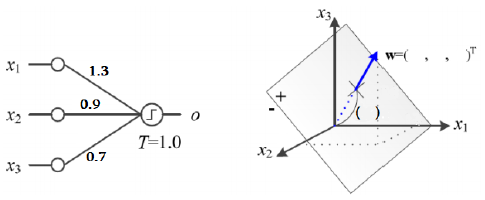

(1) 해당 퍼셉트론에 의해 결정되는 결정평면의 방향과 원점에서의 거리를 구하세요.

In [ ]:
# 결정평면의 방향은 다음과 같다.
W = (1.3, 0.9, 0.7)
print(f"W = (w1, w2, w3) = {W}")

W = (w1, w2, w3) = (1.3, 0.9, 0.7)


In [ ]:
# 결정평면의 원점에서의 거리는 T / (W의 L2 norm)을 계산하여 구할 수 있다.
T = 1.0

sqsum = 0
for i in range(len(W)):
  sqsum += W[i] ** 2 
l2_norm = np.sqrt(sqsum)

print(f"원점에서의 거리: {T/l2_norm:.2f}")

원점에서의 거리: 0.58


(2) T=0.0으로 바꾸기 위해 퍼셉트론을 수정하고 결정평면의 변화를 설명하세요.

In [1]:
# T를 T=0.0으로 바꾸기 위해서는 편향을 추가하면 된다.
# 현재의 퍼셉트론의 동작에 대한 식은 x1 * w1 + x2 * w2 + x3 * w3 = T, 
# 1.3 * x1 + 0.9 * x2 + 0.7 * x3 = 1.0 이다.
# 따라서 여기에 x0 = 1.0인 편향 항을 추가하면, 편향 w0를 추가하여 T = 0.0으로 바꿀 수 있다.
# 이에 대한 퍼셉트론의 동작에 대한 식은 다음과 같다.
print("x1 * w1 + x2 * w2 + x3 * w3 + x0 * w0 = 0")
print("1.3 * x1 + 0.9 * x2 + 0.7 * x3 + 1.0 * (-1.0) = 0")
print("수정된 퍼셉트론 동작 식: 1.3 * x1 + 0.9 * x2 + 0.7 * x3 - 1.0 = 0")

x1 * w1 + x2 * w2 + x3 * w3 + x0 * w0 = 0
1.3 * x1 + 0.9 * x2 + 0.7 * x3 + 1.0 * (-1.0) = 0
수정된 퍼셉트론 동작 식: 1.3 * x1 + 0.9 * x2 + 0.7 * x3 - 1.0 = 0


- 결정평면의 경우 퍼셉트론의 동작 식이 수정되었더라도 기존의 결정평면과 동일한 결정평면을 가진다.
- 다만 결정평면의 의미가 달라진다.
- 기존의 퍼셉트론 동작 식을 보면, 1.3 * x1 + 0.9 * x2 + 0.7 * x3 = 1.0이고, 이는 입력벡터 (x1, x2, x3)와 가중치 벡터 (1.3, 0.9, 0.7)을 내적하였을 때 결과가 1이 나온다는 의미이다.
- 반면 수정된 퍼셉트론의 동작 식은 1.3 * x1 + 0.9 * x2 + 0.7 * x3 - 1.0 = 0이고, 이는 입력벡터 (x1, x2, x3)와 가중치 벡터 (1.3, 0.9, 0.7)을 내적한 결과를 -1.0만큼 이동시켰을 때의 결과가 0이 나온다는 의미로 해석될 수 있다.

### 9. [PLA] PLA(Perceptron Learning Algorithm) 가중치 갱신 법칙 𝑤(𝑡+1)=𝑤(𝑡)+𝑦(𝑡)𝑥(𝑡)를 보고 다음 문제의 답을 보이세요. (18점, 각 6점)

(1) 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡) < 0임을 보이세요. (Hint: 𝑥(𝑡)는 𝑤(𝑡)에 의해 오분류 됨)

> 먼저, y(t) = 1인 경우 x(t)가 w(t)에 의해 오분류되면 s(w^T(t)x(t)) = -1(s는 계단함수)이고 이 때 항상 w^T(t)x(t) < 0이 된다. y(t) = 1 > 0, w^T(t)x(t) < 0이므로, 둘을 곱하면 y(t)w^T(t)x(t) < 0이다.

> 두번째로, y(t) = -1인 경우 x(t)가 w(t)에 의해 오분류되면 s(w^T(t)x(t)) = 1이고 이 때 항상 w^T(t)x(t) > 0이 된다. y(t) = -1 < 0, w^T(t)x(t) > 0이므로, 둘을 곱하면 y(t)w^T(t)x(t) < 0이다.

> 따라서 y(t) = 1, y(t) = -1인 모든 경우에 대해서 항상 y(t)w^T(t)x(t) < 0이다.

(2) 𝑦(𝑡)𝑤^𝑇(𝑡+1)𝑥(𝑡) > 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡) 임을 보이세요. (Hint: 𝑤(𝑡+1) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡) 이용)

> 𝑦(𝑡)𝑤^𝑇(𝑡+1)𝑥(𝑡)에 𝑤(𝑡+1) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡)을 대입하여 전개하면, 𝑦(𝑡)𝑤^𝑇(𝑡+1)𝑥(𝑡) = 𝑦(𝑡)(𝑤^𝑇(𝑡) + 𝑦(𝑡)𝑥^𝑇(𝑡))𝑥(𝑡) = 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡) + 𝑦(𝑡)^2𝑥^𝑇(𝑡)𝑥(𝑡)가 된다. 여기서 𝑦(𝑡)^2는 스칼라값을 제곱한 것이므로 항상 양수이고, 𝑥^𝑇(𝑡)𝑥(𝑡)는 벡터 𝑥(𝑡)가 자기자신을 내적한 스칼라값이므로 이 또한 항상 양수가 된다. 따라서 𝑦(𝑡)^2𝑥^𝑇(𝑡)𝑥(𝑡) > 0이므로 𝑦(𝑡)𝑤^𝑇(𝑡+1)𝑥(𝑡) = 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡) + 𝑦(𝑡)^2𝑥^𝑇(𝑡)𝑥(𝑡) > 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡)임을 알 수 있다.

(3) 𝑤(𝑡)에서 𝑤(𝑡+1)로 이동하는 것이 𝑥(𝑡)를 분류하는데 올바른 방향으로 이동함을 설명하세요.

> PLA에서 퍼셉트론의 손실함수는 J(w) = - 𝑦(𝑡)𝑤^𝑇(𝑡)𝑥(𝑡) > 0로 정의된다. 이 때 경사하강법을 적용하기 위해 J(w)를 w에 대해 편미분하면 ∂J(w)/∂w = -𝑦(𝑡)𝑥(𝑡)가 된다. 기울기값에 대해 생각해보면, 기울기값이 음수일 경우 w가 음의 방향으로 이동할 때 함수값 J(w)가 증가하고, 기울기값이 양수일 경우 w가 양의 방향으로 이동할 때 함수값 J(w)가 증가한다는 의미이다. 따라서 w가 기울기값의 반대 부호의 방향으로 계속해서 이동해야 함수값 J(w)가 감소하고 퍼셉트론의 목표인 손실함수의 최솟값에 도달할 수 있다. 학습률을 1이라고 가정하고 이를 수식으로 표현하면, 𝑤(𝑡+1) = 𝑤(𝑡) - ∂J(w)/∂w = 𝑤(𝑡) - (-𝑦(𝑡)𝑥(𝑡)) = 𝑤(𝑡) + 𝑦(𝑡)𝑥(𝑡)가 되므로 𝑤(𝑡)에서 𝑤(𝑡+1)로 이동하는 것이 𝑥(𝑡)를 분류하는데 올바른 방향으로 이동한다는 것을 알 수 있다.

### 10. [MLP] 다음은 은닉층이 3개인 MLP입니다. (16점, 각 4점)

> 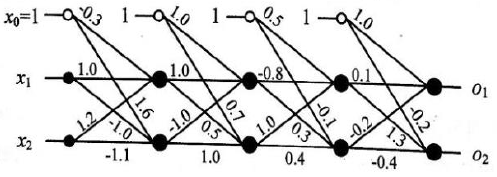

(1) 가중치 행렬 U1, U2, U3, U4를 쓰세요.

- MLP에서 각 층에 입력되는 벡터 X의 크기가 편향을 포함하여 (3, 1)이고, 출력 벡터 Y의 크기가 (2, 1)이므로 Y = U * X(행렬곱)에서 가중치 행렬 U의 크기는 (2, 3)이어야 한다.
- 이를 기준으로 위의 그림에서의 가중치 행렬들을 각각 쓰면 다음과 같다.

In [14]:
U1 = torch.tensor([[-0.3, 1.0, 1.2], [1.6, -1.0, -1.1]])
U2 = torch.tensor([[1.0, 1.0, -1.0], [0.7, 0.5, 1.0]])
U3 = torch.tensor([[0.5, -0.8, 1.0], [-0.1, 0.3, 0.4]])
U4 = torch.tensor([[1.0, 0.1, -0.2], [-0.2, 1.3, -0.4]])
print(f"U1:\n{U1}\nU2:\n{U2}\nU3:\n{U3}\nU4:\n{U4}")

U1:
tensor([[-0.3000,  1.0000,  1.2000],
        [ 1.6000, -1.0000, -1.1000]])
U2:
tensor([[ 1.0000,  1.0000, -1.0000],
        [ 0.7000,  0.5000,  1.0000]])
U3:
tensor([[ 0.5000, -0.8000,  1.0000],
        [-0.1000,  0.3000,  0.4000]])
U4:
tensor([[ 1.0000,  0.1000, -0.2000],
        [-0.2000,  1.3000, -0.4000]])


(2) x=(1, 0)^T가 입력되었을 때 출력 o=(o1, o2)^T를 구하세요. 활성함수는 로지스틱 시그모이드를 사용하세요.


In [15]:
x = torch.tensor([[1.0, 0.0]]).view(-1, 1) # 벡터 x를 정의.
x0 = torch.tensor([[1.0]])                 # 편향 x0를 1로 정의.

in1 = torch.cat([x0, x])         # 입력 벡터 x와 편향 x0를 붙여 입력 벡터 in1을 정의.
out1 = torch.sigmoid(U1.mm(in1)) # MLP 첫번째 층의 output 계산.
                                 # torch.mm을 이용하여 가중치와 입력 벡터의 행렬곱을 계산.
                                 # torch.sigmoid는 로지스틱 시그모이드 값을 계산해주는 함수.
                                 # 행렬곱의 결과를 로지스틱 시그모이드 함수에 입력하여 출력 벡터 out1 계산

in2 = torch.cat([x0, out1])      # MLP 첫번째 층의 output인 out1과 편향 x0를 붙여 두번째 층의 입력 벡터 in2 정의
out2 = torch.sigmoid(U2.mm(in2)) # 두번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                                 # 행렬곱의 결과를 로지스틱 시그모이드 함수에 입력하여 출력 벡터 out2 계산
                                 
in3 = torch.cat([x0, out2])      # MLP 두번째 층의 output인 out2과 편향 x0를 붙여 세번째 층의 입력 벡터 in3 정의
out3 = torch.sigmoid(U3.mm(in3)) # 세번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                                 # 행렬곱의 결과를 로지스틱 시그모이드 함수에 입력하여 출력 벡터 out3 계산

in4 = torch.cat([x0, out3])      # MLP 세번째 층의 output인 out3과 편향 x0를 붙여 네번째 층의 입력 벡터 in4 정의
o_sig = torch.sigmoid(U4.mm(in4))# 네번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                                 # 행렬곱의 결과를 로지스틱 시그모이드 함수에 입력하여 최종 출력 벡터 o 계산
# 따라서 출력 o=(o1, o2)^T는 다음과 같다.
print(f"o = (o1, o2)^T =\n{o_sig}")                                                                 

o = (o1, o2)^T =
tensor([[0.7202],
        [0.6081]])


(3) x=(1, 0)^T가 입력되었을 때 출력 o=(o1, o2)^T를 구하세요. 활성함수는 ReLU를 사용하세요.

In [16]:
from torch.nn.functional import relu       # 활성함수로 ReLU를 사용하기 위해 relu 함수를 임포트한다.
x = torch.tensor([[1.0, 0.0]]).view(-1, 1) # 벡터 x를 정의.
x0 = torch.tensor([[1.0]])                 # 편향 x0를 1로 정의.

in1 = torch.cat([x0, x])    # 입력 벡터 x와 편향 x0를 붙여 입력 벡터 in1을 정의.
out1 = relu(U1.mm(in1))     # MLP 첫번째 층의 output 계산.
                            # 첫번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                            # 행렬곱의 결과를 ReLU 함수에 입력하여 출력 벡터 out1 계산

in2 = torch.cat([x0, out1]) # MLP 첫번째 층의 output인 out1과 편향 x0를 붙여 두번째 층의 입력 벡터 in2 정의
out2 = relu(U2.mm(in2))     # 두번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                            # 행렬곱의 결과를 ReLU 함수에 입력하여 출력 벡터 out2 계산
                                 
in3 = torch.cat([x0, out2]) # MLP 두번째 층의 output인 out2과 편향 x0를 붙여 세번째 층의 입력 벡터 in3 정의
out3 = relu(U3.mm(in3))     # 세번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                            # 행렬곱의 결과를 ReLU 함수에 입력하여 출력 벡터 out3 계산

in4 = torch.cat([x0, out3]) # MLP 세번째 층의 output인 out3과 편향 x0를 붙여 네번째 층의 입력 벡터 in4 정의
o_relu = relu(U4.mm(in4))   # 네번째 층의 가중치와 입력 벡터의 행렬곱을 계산하고
                            # 행렬곱의 결과를 ReLU 함수에 입력하여 최종 출력 벡터 o 계산
# 따라서 출력 o=(o1, o2)^T는 다음과 같다.
print(f"o = (o1, o2)^T =\n{o_relu}")                                                                 

o = (o1, o2)^T =
tensor([[0.9490],
        [1.0950]])


(4) x=(1,0)^T의 기대 출력이 o=(0,1)일 때, 현재 1.0인 image.png
 가중치를 0.9로 줄이면 오류에 어떤 영향을 미치는지 설명하세요.

- 오류에 대한 영향을 보기 위해 활성함수가 sigmoid일 때와 ReLU일 때로 나누어 계산해보았다.
  1. 먼저 가중치 값이 처음 상태일 때 활성함수를 sigmoid로 사용하여 위에서 구한 출력은 아래와 같다.

In [17]:
print(f"o:\n{o_sig}")                                                                 

o:
tensor([[0.7202],
        [0.6081]])


- 위의 출력과 기대 출력 o=(0,1)와의 손실함수 값을 MSE를 통해 구하면 다음과 같다. 

In [18]:
o_target = torch.tensor([[0.0, 1.0]]).view(-1, 1)

loss = torch.nn.MSELoss()
loss_target = loss(o_sig, o_target)
print(f"활성함수가 sigmoid일 때 출력 벡터 o와 기대 출력과의 loss: {loss_target:.6f}")

활성함수가 sigmoid일 때 출력 벡터 o와 기대 출력과의 loss: 0.336158


- 다음으로 image.png의 가중치를 0.9로 변경한 후 출력 벡터 o_new를 계산하면 다음과 같다.

In [19]:
U3[0, 2] = 0.9      # 인덱스에 주의.
print(f"U3:\n{U3}") # u_12^3의 값이 0.9로 바뀐 것 확인

# o_new를 계산
in1 = torch.cat([x0, x])
out1 = torch.sigmoid(U1.mm(in1))
in2 = torch.cat([x0, out1])
out2 = torch.sigmoid(U2.mm(in2))
in3 = torch.cat([x0, out2])
out3 = torch.sigmoid(U3.mm(in3))
in4 = torch.cat([x0, out3])
o_sig_new = torch.sigmoid(U4.mm(in4))
print(f"o_new:\n{o_sig_new}")

U3:
tensor([[ 0.5000, -0.8000,  0.9000],
        [-0.1000,  0.3000,  0.4000]])
o_new:
tensor([[0.7198],
        [0.6023]])


- o_new와 기대 출력 o=(0,1)와의 손실함수 값을 MSE를 통해 구하면 다음과 같다.

In [20]:
loss_new_target = loss(o_sig_new, o_target)
print(f"활성함수가 sigmoid일 때 출력 벡터 o와 기대 출력과의 loss: {loss_target:.6f}")
print(f"활성함수가 sigmoid일 때 출력 벡터 o_new와 기대 출력과의 loss: {loss_new_target:.6f}")

활성함수가 sigmoid일 때 출력 벡터 o와 기대 출력과의 loss: 0.336158
활성함수가 sigmoid일 때 출력 벡터 o_new와 기대 출력과의 loss: 0.338169


- 출력 결과를 보면, image.png 가중치의 값이 1.0에서 0.9로 줄어들었을 때 오류에 해당하는 손실함수 값(loss)이 증가한 것을 알 수 있다.
- image.png의 값을 1.0에서 0.9로 변경하면서 오히려 기존보다 오류가 더 커졌고, 이는 출력 벡터 o_new와 기대 출력과의 차이가 기존의 벡터 o와의 차이보다 커졌다는 것을 의미한다.
- 따라서 위의 변화는 오류를 줄이는데 있어 부정적인 영향을 미친다는 것을 알 수 있다.

  2. 다음으로 가중치 값이 처음 상태일 때 활성함수를 ReLU로 사용하여 위에서 구한 출력은 아래와 같다.

In [21]:
print(f"o:\n{o_relu}")                                                                 

o:
tensor([[0.9490],
        [1.0950]])


- 위의 출력과 기대 출력 o=(0,1)와의 손실함수 값을 MSE를 통해 구하면 다음과 같다. 

In [22]:
loss = torch.nn.MSELoss()
loss_target = loss(o_relu, o_target)
print(f"활성함수가 ReLU일 때 출력 벡터 o와 기대 출력과의 loss: {loss_target:.6f}")

활성함수가 ReLU일 때 출력 벡터 o와 기대 출력과의 loss: 0.454813


- 다음으로 image.png의 가중치를 0.9로 변경한 후 위와 동일한 방식으로 출력 벡터 o_new를 계산하면 다음과 같다.

In [24]:
print(f"U3:\n{U3}") # u_12^3의 값이 0.9로 바뀐 것 확인

# o_new를 계산
in1 = torch.cat([x0, x])
out1 = relu(U1.mm(in1))
in2 = torch.cat([x0, out1])
out2 = relu(U2.mm(in2))
in3 = torch.cat([x0, out2])
out3 = relu(U3.mm(in3))
in4 = torch.cat([x0, out3])
o_relu_new = relu(U4.mm(in4))
print(f"o_new:\n{o_relu_new}")

U3:
tensor([[ 0.5000, -0.8000,  0.9000],
        [-0.1000,  0.3000,  0.4000]])
o_new:
tensor([[0.9325],
        [0.8805]])


- o_new과 기대 출력 o=(0,1)와의 손실함수 값을 MSE를 통해 구하면 다음과 같다.

In [25]:
loss_new_target = loss(o_relu_new, o_target)
print(f"활성함수가 ReLU일 때 출력 벡터 o와 기대 출력과의 loss: {loss_target:.6f}")
print(f"활성함수가 ReLU일 때 출력 벡터 o_new와 기대 출력과의 loss: {loss_new_target:.6f}")

활성함수가 ReLU일 때 출력 벡터 o와 기대 출력과의 loss: 0.454813
활성함수가 ReLU일 때 출력 벡터 o_new와 기대 출력과의 loss: 0.441918


- 출력 결과를 보면, image.png 가중치의 값이 1.0에서 0.9로 줄어들었을 때 오류에 해당하는 손실함수 값(loss)이 줄어든 것을 알 수 있다.
- 따라서 image.png의 값을 1.0에서 0.9로 갱신함으로써 오류에 긍정적인 영향을 주고, 출력 벡터 o_new와 기대 출력과의 차이가 기존의 벡터 o와의 차이보다 줄어들었다, 즉, 기대 출력과 비슷해졌다는 것을 의미한다.
- 또한 어떤 활성함수를 사용하느냐에 따라서 가중치가 같은 값으로 갱신되더라도 오류에 부정적인 영향을 미칠수도 있고, 긍정적인 영향을 미칠수도 있다는 것을 알 수 있다.

### 11. 아래 그림의 연산 그래프 예처럼 f(x, y, z)= (x+y)z 연산에 대한 연산 그래프를 새롭게 생성하고, x=-2, y=5, z=-4인 경우에 전방 전파와 이에 대응되는 오류 역전파를 각 가중치마다 계산하세요. (10점)

* 먼저 전방 전파에 대한 연산을 q(x, y) = x + y, f(q, z) = q * z로 나누면, x = -2, y = 5일 때 q(-2, 5) = 3이고 f(3, -4) = -12이다.
* 오류 역전파를 수행하기 위해 출력에서 ∂L/∂f = 1로 주어졌다고 가정하면, f는 곱셈 연산이므로 ∂f/∂q = z = -4이고 ∂f/∂z = q = 3이다.
* 다음으로 ∂f/∂x와 ∂f/∂y를 각각 구하면, q는 덧셈 연산이므로 미분의 연쇄법칙에 의해 ∂f/∂x = ∂f/∂q * ∂q/∂x = ∂f/∂q * 1 = -4 * 1 = -4이고, ∂f/∂y = ∂f/∂q * ∂q/∂y = ∂f/∂q * 1 = -4 * 1 = -4이다.

> 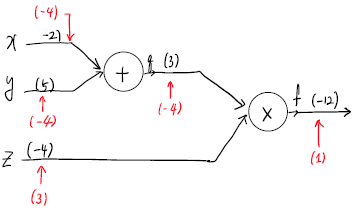

### 12. 먼저 Pytorch Tutorials을 진행하고, 문제 링크에 제시된 와인 데이터를 분류하는 간단한 신경망이 제시되어 있다. 제시된 신경망의 공백 처리되어 있는 코드(문제)를 주어진 조건에 맞게 구현하여 올바르게 실행되도록 작성하세요.

Q 1:

In [ ]:
# train_loader 생성
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)

Q 2: 

In [ ]:
# 간단한 Linear 모델 구성
### Linear 층 정의 ###
self.fc1 = nn.Linear(13, 256)  # 훈련 샘플 한 개의 특징값 갯수가 13개이므로, 첫번째 층(입력층)의 input에 13 입력.
                               # 첫번째 층의 output 사이즈는 256으로 지정.
self.fc2 = nn.Linear(256, 128) # 두번째 층의 input 사이즈는 256이고, output 사이즈는 128으로 지정.
self.fc3 = nn.Linear(128, 64)  # 세번째 층의 input 사이즈는 128이고, output 사이즈는 64로 지정.
self.fc4 = nn.Linear(64, 32)   # 네번째 층의 input 사이즈는 64이고, output 사이즈는 32로 지정.
self.fc5 = nn.Linear(32, 16)   # 다섯번째 층의 input 사이즈는 32이고, output 사이즈는 16으로 지정.
self.fc6 = nn.Linear(16, 3)    # 여섯번째 층(출력층)의 input 사이즈는 16이고, output 사이즈는 3으로 지정.

### Batch Nomalization 층 정의 ###
self.bn1 = nn.BatchNorm1d(256) # 첫번째 Batch Nomalization 층은 첫번째 Linear 층 직후이므로 input이 256이 됨.
self.bn2 = nn.BatchNorm1d(128) # 두번째 Batch Nomalization 층은 두번째 Linear 층 직후이므로 input이 128이 됨.
self.bn3 = nn.BatchNorm1d(64)  # 세번째 Batch Nomalization 층은 세번째 Linear 층 직후이므로 input이 64가 됨.

### ReLU 및 Softmax 선언 ###
self.relu = nn.ReLU()            # 활성함수 ReLU 선언.
self.softmax = nn.Softmax(dim=1) # 멤버변수로 Softmax 선언.
                                 # 신경망 출력층의 output size가 (1, 3)이므로 Softmax에 입력 시 dim=1로 설정해줘야
                                 # 3개의 클래스에 대한 확률값(합이 1)을 계산할 수 있음.

Q 3:

In [ ]:
# Linear 모델 forward 함수 작성
x = self.relu(self.bn1(self.fc1(x))) # 입력 벡터 x를 fc1 - bn1 - relu의 순서로 통과시킴.
x = self.relu(self.bn2(self.fc2(x))) # 첫번째 층의 output을 fc2 - bn2 - relu의 순서로 통과시킴.
x = self.relu(self.bn3(self.fc3(x))) # 두번째 층의 output을 fc3 - bn3 - relu의 순서로 통과시킴.
x = self.relu(self.fc4(x))           # 세번째 층의 output을 fc4 - relu의 순서로 통과시킴.
x = self.relu(self.fc5(x))           # 네번째 층의 output을 fc5 - relu의 순서로 통과시킴.
x = self.softmax(self.fc6(x))        # 다섯번째 층의 output을 fc6 - softmax의 순서로 통과시킴.

Q 4:

In [ ]:
# Optimizer 생성
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # 문제의 조건에 따라 optimizer 생성

Q 5:

In [ ]:
# 손실 함수 생성
criterion = nn.CrossEntropyLoss() # 문제의 조건에 따라 criterion 생성

Q 6:

In [ ]:
# Training code 작성
optimizer.zero_grad()       # 기존에 계산된 gradient를 초기화.

output = model(x)           # 훈련 데이터를 model에 입력하여 forward 전파 수행.
                            # output으로 각 샘플마다 3개의 클래스에 대해 예측한 확률값이 계산됨.
loss = criterion(output, y) # output과 label 값을 손실함수에 입력하여 손실값 계산.
loss.backward()             # 손실값으로부터 오류 역전파 진행하여 그레디언트 계산.
optimizer.step()            # 가중치 갱신.